# Linear Regression implementation using Tensorflow

In [492]:
# import required modules

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection

# to show up plots within notebook
%matplotlib inline

In [493]:
# read data from text file
data = np.genfromtxt('ex1data1.txt', delimiter=',')

In [494]:
m,n = data.shape
print(m,n)

97 2


In [495]:
# Get input features and output labels
Features, labels = data[:, 0:1], data[:, 1]

In [496]:
# Feature Normalization
mu = np.mean(Features, axis=0)
sigma = np.std(Features, axis=0)

Features = (Features - mu) / sigma

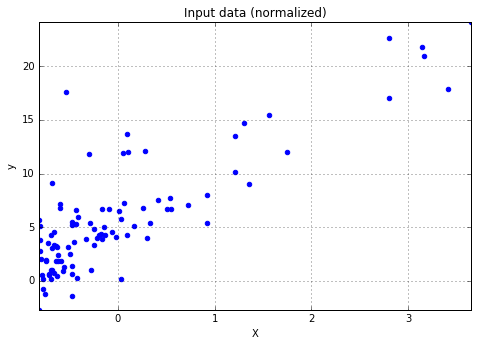

In [498]:
# visualize input data
#plt.scatter(Features, labels, marker='x')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xlim([np.min(Features), np.max(Features)])
ax.set_ylim([np.min(labels), np.max(labels)])
ax.scatter(Features, labels, color='blue');
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Input data (normalized)')
ax.grid(axis='both')

In [499]:
# Add Bias vector which is a vector with all 1's
Features = np.hstack((np.ones((m,1)), Features))

In [500]:
m1, n1 = Features.shape

In [501]:
# Split the data into training set and test set
# 25% of data is separated as test set which is used to compute predictions and model behaviour
X_train, X_test, y_train, y_test = model_selection.train_test_split(Features, labels, test_size=0.25, random_state=40)

m_train, n_train = X_train.shape
m_test, n_test = X_test.shape

print(m_train, n_train)
print(m_test, n_test)

72 2
25 2


In [502]:
# required for numpy
y_train = np.reshape(y_train, (m_train, 1))
y_test = np.reshape(y_test, (m_test, 1))
y_train.shape
y_test.shape

(25, 1)

In [504]:
# Tensorflow parameters
alpha = 0.01 # learning rate
num_epochs = 1000 # no of times complete dataset is iterated

error = np.empty(shape=[1],dtype=float)  # we will be appending cost/error of each iteration

In [505]:
# specify variable data types
X = tf.placeholder(tf.float32, [m_train, n_train])
y = tf.placeholder(tf.float32, [m_train, 1])

# output parameters that fit the model
theta = tf.Variable(tf.ones([n_train, 1]))

feed_dict = {X:X_train, y:y_train}

In [507]:
init = tf.global_variables_initializer()

In [508]:
# Cost function - which is Mean square error
cost = tf.reduce_mean(tf.square(tf.matmul(X, theta) - y))

In [510]:
training_step = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

In [511]:
# Train the model using training data

with tf.Session() as ssn:
    ssn.run(init);

    # loop through all iterations
    for epoch in range(num_epochs):
        val = ssn.run(training_step, feed_dict=feed_dict);
        error = np.append(error, ssn.run(cost, feed_dict=feed_dict));

    # save final parameters for computing predictions
    theta_fit = ssn.run(theta);

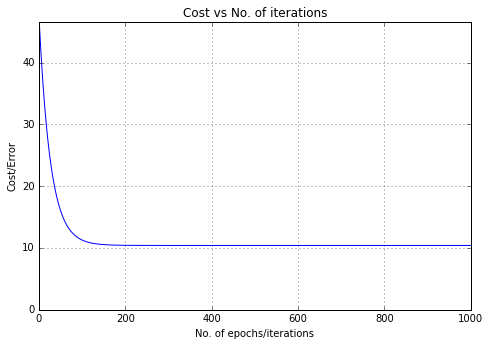

In [484]:
# Plot the change of error with respect to iterations
# As we loop through more iterations the training error should ideally come down
# Depending upon data and learning rate (alpha) determine at which rate the error come down

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xlim([0, num_epochs])
ax.set_ylim([np.min(error), np.max(error)])
ax.plot(range(len(error)), error, color='blue');
ax.set_xlabel('No. of epochs/iterations')
ax.set_ylabel('Cost/Error')
ax.set_title('Cost vs No. of iterations')
ax.grid(axis='both')

From the plot it is clear that error minimized fairly quickly

In [513]:
theta_fit

array([[ 6.13475418],
       [ 4.72931576]], dtype=float32)

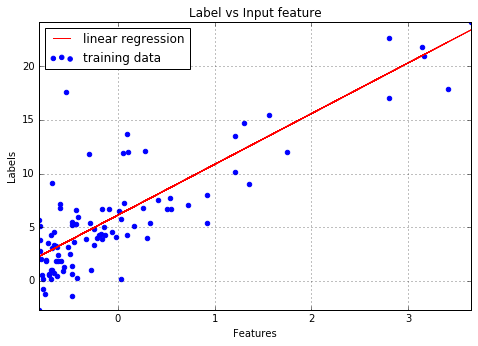

In [518]:
# Now we know the parameters, plot the linear regression curve to see how well it is fit with the given data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xlim([np.min(Features), np.max(Features)])
ax.set_ylim([np.min(labels), np.max(labels)])
ax.set_xlabel('Features')
ax.set_ylabel('Labels')
ax.set_title('Label vs Input feature')

ax.scatter(Features[:, 1], labels, color='blue', label='training data');
ax.plot(Features[:, 1], np.matmul(Features, theta_fit), 'r', label='linear regression')

ax.legend(loc="upper left")
ax.grid(axis='both')

In [519]:
# Make predictions
y_pred = np.matmul(X_test, theta_fit)
   
print("RMSE: %.4f" % np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 2.2719


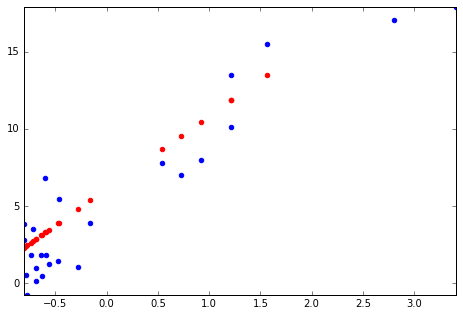

In [520]:
# plot predicted data with respect to test data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xlim([np.min(X_test[:, 1]), np.max(X_test[:, 1])])
ax.set_ylim([np.min(y_test), np.max(y_test)])
ax.scatter(X_test[:, 1], y_test, color='blue');
ax.scatter(X_test[:, 1], y_pred, color='red');